In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [19]:
products=pd.read_csv('Products.csv')
transactions=pd.read_csv('Transactions.csv')
customers=pd.read_csv('Customers.csv')

In [20]:
merged = pd.merge(transactions, customers, on="CustomerID")
merged = pd.merge(merged, products, on="ProductID")

In [21]:
print(merged.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
clustering_data = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean'  # Ensure the 'Price' column exists in the merged DataFrame
}).reset_index()

In [25]:
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data.iloc[:, 1:])

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_data)
clustering_data['Cluster'] = clusters

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
db_index = davies_bouldin_score(scaled_clustering_data, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.9183282802588962


In [28]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_clustering_data)
clustering_data['PCA1'] = reduced_data[:, 0]
clustering_data['PCA2'] = reduced_data[:, 1]

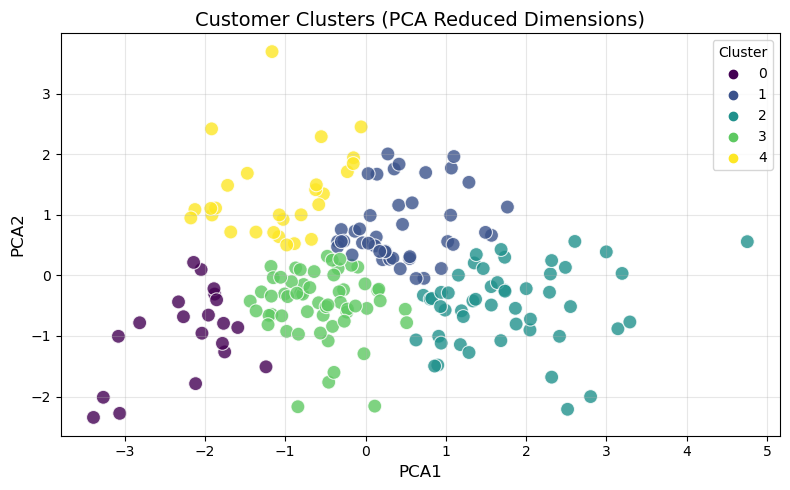

In [31]:
plt.figure(figsize=(8, 5))
sn.scatterplot(data=clustering_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title("Customer Clusters (PCA Reduced Dimensions)", fontsize=14)
plt.xlabel("PCA1", fontsize=12)
plt.ylabel("PCA2", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()